# Summer 2022 Data Science Intern Challenge
### Solution By Sheldon Roberts

### Question 1
**a)**
> Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
orders = pd.read_csv("orders.csv")

aov = orders["order_amount"].mean()
mov = orders["order_amount"].median()

print(f"Average order value: ${aov:.2f}")
print(f"Median order value: ${mov:.2f}")
orders.nlargest(4, "order_amount")

Average order value: $3145.13
Median order value: $284.00


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00


The mean being much larger than the median is a strong indication that the data is positively (right) skewed. A quick look at the data shows that there are also a group of outlier orders of $704,000.

We could remove the outlier data by discarding certain orders, however this would incur bias as the cutoff is subjective.

It would be better to evaluate this data using a metric more resistant to extreme values (such as median or mode)

**b)**

> What metric would you report for this dataset?

I would use the median order value (MOV) as a metric for this dataset. 

**c)**
> What is its value?

The median order value was $284.00 for this dataset. I used a histogram to confirm that this was a reasonable value.

array([[<AxesSubplot:title={'center':'order_amount'}>]], dtype=object)

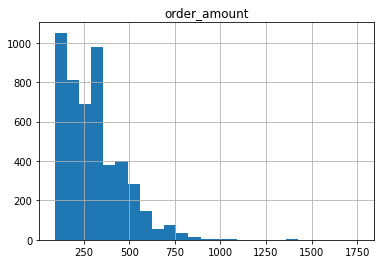

In [47]:
orders[orders["order_amount"] < 10000].hist(column='order_amount', bins=25)

### Question 2

**a)**
> How many orders were shipped by Speedy Express in total?

**answer:** 54

~~~~sql
SELECT Count(*) AS Orders
FROM Orders o, Shippers s
WHERE o.ShipperID = s.shipperID
AND s.ShipperName = "Speedy Express"
~~~~

**b)**
> What is the last name of the employee with the most orders?

**answer:** Peacock

~~~~sql
SELECT e.LastName
FROM Employees e, Orders o
WHERE e.EmployeeID = o.EmployeeID
GROUP BY e.EmployeeID
ORDER BY COUNT(*) DESC LIMIT 1
~~~~

**c)**
> What product was ordered the most by customers in Germany?

**answer:** Boston Crab Meat

~~~~sql
SELECT p.ProductName, SUM(od.Quantity) AS Quantity
FROM Orders o, OrderDetails od, Customers c, Products p
WHERE c.CustomerID = o.CustomerID
AND c.Country = "Germany"
AND o.OrderID = od.OrderID
AND p.ProductID = od.ProductID
GROUP BY od.ProductID
ORDER BY Quantity DESC LIMIT 1
~~~~